### Step 1: Install & Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Step 2: Load the Mining Dataset

In [2]:
df = pd.read_csv("mining.csv")
df.head()


,Date,Mine_Site,Weather_Condition,Temperature_C,Humidity_%,Rainfall_mm,Wind_Speed_kph,Dust_Level_ug_m3,Mining_Tip
0,2022-01-01,Shabanie Mashaba Mine,Clear,29.2,26.4,0.1,49.9,147.2,Good time for aerial surveys of the pit.
1,2022-01-02,Freda Rebecca Mine,Clear,35.6,28.9,0.9,11.3,189.0,Good time for aerial surveys of the pit.
2,2022-01-03,ZIMPLATS Derby PGM Mine,Hot,36.3,73.8,0.9,45.6,65.5,Monitor worker heat stress — schedule frequent...
3,2022-01-04,Unki Mine,Partly Cloudy,37.8,25.3,0.7,26.4,72.8,Monitor light levels in underground shafts.
4,2022-01-05,Freda Rebecca Mine,Hot,35.8,72.1,0.0,32.2,47.6,Inspect machinery cooling systems frequently.


### Step 3: Encode Categorical Columns

In [3]:
# Encode target variable
tip_encoder = LabelEncoder()
df["Tip_Label"] = tip_encoder.fit_transform(df["Mining_Tip"])

# Encode weather condition
df["Weather_Code"] = LabelEncoder().fit_transform(df["Weather_Condition"])


### Step 4: Define Features and Target

In [4]:
features = [
    "Temperature_C",
    "Humidity_%",
    "Wind_Speed_kph",
    "Rainfall_mm",
    "Weather_Code"
]

X = df[features]
y = df["Tip_Label"]


### Step 5: Split Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 6: Train the Model

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 7: Evaluate Performance

Accuracy: 0.3

Classification Report:
                                                                    precision    recall  f1-score   support

        Check stability of conveyor belts and hoisting equipment.       0.20      0.20      0.20        10
                        Check water drainage systems around pits.       0.25      0.57      0.35         7
         Ensure dust controls are in place during dry conditions.       0.17      0.15      0.16        13
                  Ensure workers seek shelter until storm passes.       0.63      0.75      0.69        16
                         Good time for aerial surveys of the pit.       0.18      0.36      0.24        11
                  Halt open-pit operations due to lightning risk.       0.25      0.25      0.25         8
 High wind may affect crane and lifting operations — use caution.       0.45      0.62      0.53         8
                     Inspect haul roads for erosion and potholes.       0.14      0.09      0.11        

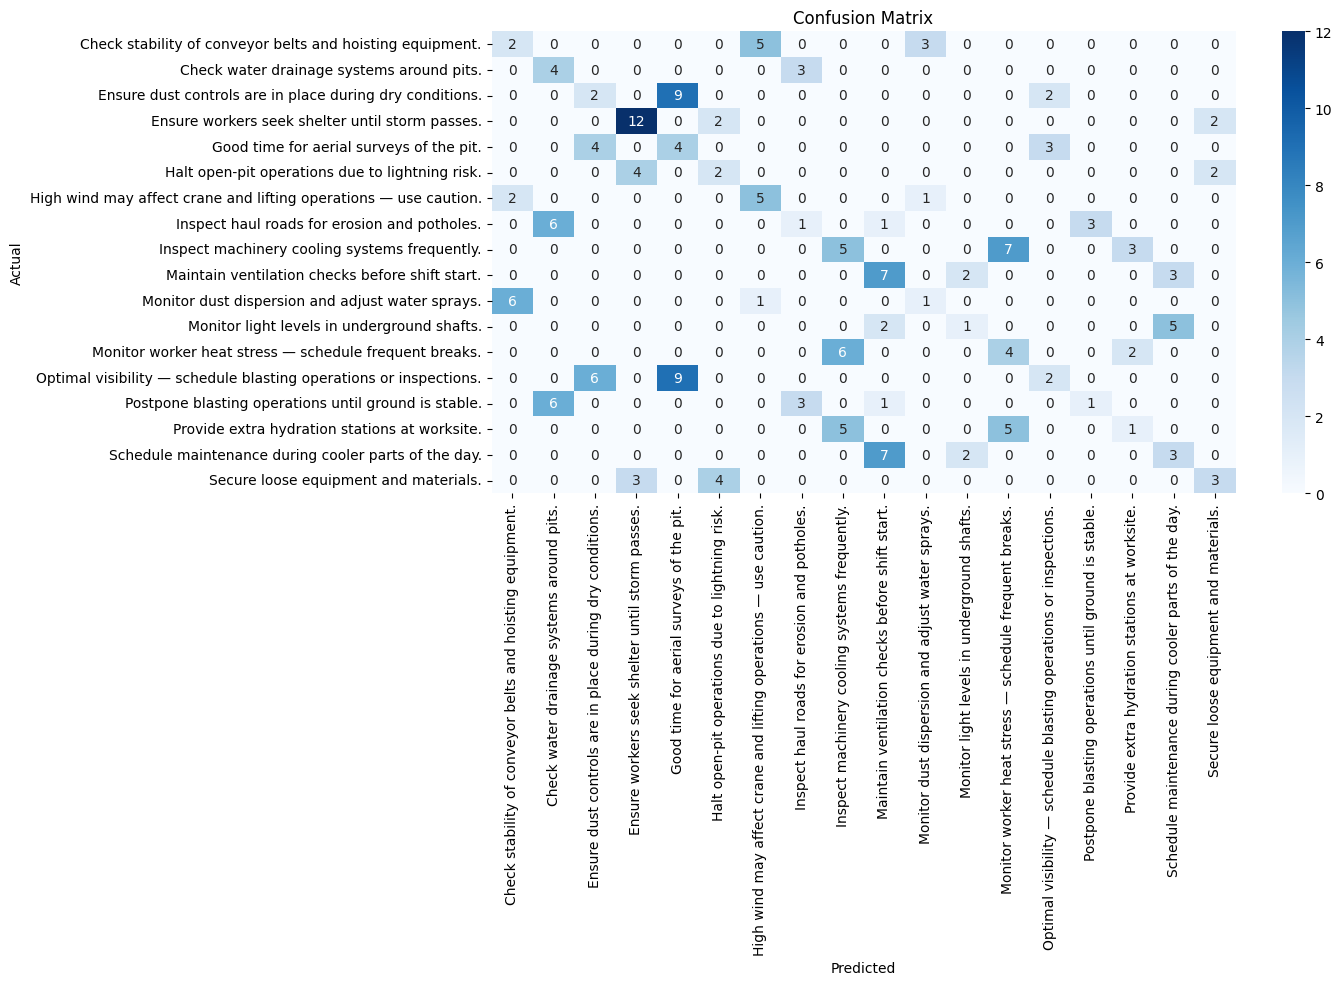

In [7]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=tip_encoder.classes_))

plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=tip_encoder.classes_, yticklabels=tip_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


###  Step 8: Predict a Mining Tip Based on Forecast Data

In [8]:
# Sample input — replace with real forecast
sample_input = pd.DataFrame([{
    "Temperature_C": 35,
    "Humidity_%": 50,
    "Wind_Speed_kph": 28,
    "Rainfall_mm": 1.5,
    "Weather_Code": LabelEncoder().fit(df["Weather_Condition"]).transform(["Clear"])[0]
}])

predicted_label = clf.predict(sample_input)[0]
predicted_tip = tip_encoder.inverse_transform([predicted_label])[0]

print("✅ Recommended Mining Tip:", predicted_tip)


✅ Recommended Mining Tip: Good time for aerial surveys of the pit.


### Step 9: Save the Model

In [9]:
import joblib

joblib.dump(clf, "mining_tip_model.pkl")
joblib.dump(tip_encoder, "mining_tip_encoder.pkl")


['mining_tip_encoder.pkl']

#### Mining Tip Prediction Script

In [10]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# === Step 1: Load your trained model and label encoder ===
clf = joblib.load("mining_tip_model.pkl")
tip_encoder = joblib.load("mining_tip_encoder.pkl")

# === Step 2: Create a new input row (forecast data) ===
# Replace the values below with actual forecast data
input_data = pd.DataFrame([{
    "Temperature_C": 37,
    "Humidity_%": 48,
    "Wind_Speed_kph": 20,
    "Rainfall_mm": 0.5,
    "Weather_Code": 0  # Use correct numeric code for the weather condition (e.g., 0 for Clear)
}])

# === Step 3: Predict mining tip ===
predicted_label = clf.predict(input_data)[0]
predicted_tip = tip_encoder.inverse_transform([predicted_label])[0]

# === Step 4: Output recommendation ===
print("✅ Recommended Mining Tip:", predicted_tip)


✅ Recommended Mining Tip: Good time for aerial surveys of the pit.
